<a href="https://colab.research.google.com/github/LeoCboi/stock_market_analysis_by_python/blob/main/ETF_All_Weather_Type_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# (라이브러리 설치 후 런타임 재시작 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (45.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and dir

In [7]:
 !pip install pykrx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.5/125.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 11.6 MB/s eta 0:00:00


In [6]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Matplotlib 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')      

# pykrx - etf 불러오기

- [kosef200](https://finance.naver.com/item/main.naver?code=069660)

In [8]:
from pykrx import stock
df = stock.get_etf_ohlcv_by_date("20100101", "20230412", "133690") #KOSEF200
df.head()

,NAV,시가,고가,저가,종가,거래량,거래대금,기초지수
날짜,,,,,,,,
2010-10-18,10231.01,10235,10240,10180,10220,907067,8996377110,2097.73
2010-10-19,10368.58,10230,10270,10125,10270,19639,200138360,2104.15
2010-10-20,10169.89,10270,11800,10175,10205,2358,24074810,2069.73
2010-10-21,10270.90,10230,10280,10225,10280,2616,26819770,2085.75
2010-10-22,10229.33,11500,11500,10235,10235,1991,20755670,2090.10


#올시즌 포트폴리오 작성

In [9]:
import plotly.express as px

df = pd.DataFrame({'자산군':['주식', '장기채권', '중기채권', '원자재', '금'],
                  '비율':[30, 40, 15, 7.5, 7.5]})
fig = px.pie(df, values = '비율', names='자산군',
             title='올시즌 포트폴리오', template="plotly_white")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [24]:
def create_portfolio_base():
    category = ['주식', '장기채권', '중기채권', '원자재', '금']
    ratio = [30, 40, 15, 7.5, 7.5]
    ticker = [#'438560', #SOL국고채3년
            '133690', #TIGER 미국나스닥100
            '411060', #ACE KRX금현물
            '356540', #ACE 종합채권
            '130680', #미래에셋 원자재 ETN
            '261240', #ACE KRX금현물
            ]

    df = pd.DataFrame({'자산군': category,
                    '세팅비중': ratio,
                    '티커': ticker})
    return df

base_df = create_portfolio_base()
base_df

,자산군,세팅비중,티커
0,주식,30.0,133690
1,장기채권,40.0,411060
2,중기채권,15.0,356540
3,원자재,7.5,130680
4,금,7.5,261240


In [25]:
fig = px.pie(base_df, values = '세팅비중', names='자산군',
             title='올웨더 포트폴리오', template="plotly_white")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#투자금 설정

In [26]:
def set_monthly_pred_investment(df, total):
    invest_ratio = []
    for i in df['세팅비중']:
        invest_ratio.append(total*i/100)
    df['예상투자금'] = invest_ratio
    return df

In [27]:
df = set_monthly_pred_investment(base_df, 200000000)
df

,자산군,세팅비중,티커,예상투자금
0,주식,30.0,133690,60000000.0
1,장기채권,40.0,411060,80000000.0
2,중기채권,15.0,356540,30000000.0
3,원자재,7.5,130680,15000000.0
4,금,7.5,261240,15000000.0


## 현재 금액 읽어오기

[pykrx 모듈](https://github.com/sharebook-kr/pykrx)을 사용하여 항목별 현재 가격을 읽어옵니다.


### 종목명 업데이트
티커는 인지하기 어떤 종목인지 인지하기 어려우므로, 종목명을 읽어옵니다.

In [28]:
from pykrx import stock

def set_etf_name(df):
    name = []
    for i in df['티커']:
        name.append(stock.get_etf_ticker_name(i))
    df['종목명'] = name
    return df

In [29]:
df = set_etf_name(df)
df

,자산군,세팅비중,티커,예상투자금,종목명
0,주식,30.0,133690,60000000.0,TIGER 미국나스닥100
1,장기채권,40.0,411060,80000000.0,ACE KRX금현물
2,중기채권,15.0,356540,30000000.0,ACE 종합채권(AA-이상)KIS액티브
3,원자재,7.5,130680,15000000.0,TIGER 원유선물Enhanced(H)
4,금,7.5,261240,15000000.0,KODEX 미국달러선물


날짜에 따라 해당 ETF가 운용시작전이었을 수도 있고, 장이 열리지 않는 날일 수 있습니다.
운용 시작 전인 경우에는 현재 금액을 0으로 설정하고, 장이 열리지 않는 날인 경우에는 그 다음 날짜를 설정하여 가격을 읽어옵니다.

In [30]:
from datetime import datetime, timedelta
def set_current_price(df, date):
    flag = True
    ohlcv_df = None
    while flag:
        ohlcv_df = stock.get_etf_ohlcv_by_ticker(date)
        if len(ohlcv_df) == 0:
            if type(date) == str:
                date = datetime.strptime(date, '%Y-%m-%d')
            date_obj = date + timedelta(days=1)
            date = str(date_obj)[:10]
        else:
            flag = False

    price = []
    for i in df['티커']:
        if ohlcv_df.index.isin([i]).sum() > 0:
            price.append(ohlcv_df.loc[i, '종가'])
        else:
            print('{}에 {}가 존재하지 않습니다.'.format(date, i))
            price.append(0)
    df['현재가'] = price
    df['투자날짜'] = str(date)[:10]
    return df

In [31]:
df = set_current_price(df, '2023-04-11')
df

,자산군,세팅비중,티커,예상투자금,종목명,현재가,투자날짜
0,주식,30.0,133690,60000000.0,TIGER 미국나스닥100,77230,2023-04-11
1,장기채권,40.0,411060,80000000.0,ACE KRX금현물,12225,2023-04-11
2,중기채권,15.0,356540,30000000.0,ACE 종합채권(AA-이상)KIS액티브,96875,2023-04-11
3,원자재,7.5,130680,15000000.0,TIGER 원유선물Enhanced(H),4440,2023-04-11
4,금,7.5,261240,15000000.0,KODEX 미국달러선물,11940,2023-04-11


## 보유 수량 설정

`예상투자금`으로 각 종목을 얼마나 구매 가능한 지 보유수량을 결정합니다.
`수량`은 `예상투자금`을 `현재가`로 나누어 반올림하여 정하였습니다.
따라서 실제 투자금은 `예상투자금`보다 클 수 있습니다.

In [32]:
def get_volume(df):
    df['수량'] = np.round(df['예상투자금']/df['현재가'])
    df['수량'].replace(np.inf, 0, inplace= True)
    df['수량'] = df['수량'].astype(int)
    return df

In [33]:
df = get_volume(df)
df

,자산군,세팅비중,티커,예상투자금,종목명,현재가,투자날짜,수량
0,주식,30.0,133690,60000000.0,TIGER 미국나스닥100,77230,2023-04-11,777
1,장기채권,40.0,411060,80000000.0,ACE KRX금현물,12225,2023-04-11,6544
2,중기채권,15.0,356540,30000000.0,ACE 종합채권(AA-이상)KIS액티브,96875,2023-04-11,310
3,원자재,7.5,130680,15000000.0,TIGER 원유선물Enhanced(H),4440,2023-04-11,3378
4,금,7.5,261240,15000000.0,KODEX 미국달러선물,11940,2023-04-11,1256


## 실투자금 업데이트

 위에서 계산한 종목별 `수량`에 따라 `현재가`로 구매했을 시, 실제 발생한 투자금을 업데이트 합니다. 실제 투자금은 수수료가 추가로 부가되지만, 수수료에 대한 부분은 고려하지 않았습니다.


In [34]:
def get_monthly_investment(df):
    df['실투자금'] = df['현재가']*df['수량']
    return df

In [35]:
df = get_monthly_investment(df)
df

,자산군,세팅비중,티커,예상투자금,종목명,현재가,투자날짜,수량,실투자금
0,주식,30.0,133690,60000000.0,TIGER 미국나스닥100,77230,2023-04-11,777,60007710
1,장기채권,40.0,411060,80000000.0,ACE KRX금현물,12225,2023-04-11,6544,80000400
2,중기채권,15.0,356540,30000000.0,ACE 종합채권(AA-이상)KIS액티브,96875,2023-04-11,310,30031250
3,원자재,7.5,130680,15000000.0,TIGER 원유선물Enhanced(H),4440,2023-04-11,3378,14998320
4,금,7.5,261240,15000000.0,KODEX 미국달러선물,11940,2023-04-11,1256,14996640


In [36]:
sum(df['실투자금'])

200034320

In [37]:
# 일자별 투자 리포트 생성하기 

# 일자별 투자 리포트 생성하기 

In [39]:
def get_portfolio_by_date(total, date):
    base_df = create_portfolio_base()
    df = set_monthly_pred_investment(base_df, total)
    df = set_etf_name(df)
    df = set_current_price(df, date)
    df = get_volume(df)
    df = get_monthly_investment(df)
    return df

In [44]:
april_df = get_portfolio_by_date(200000000, '20230412')
april_df

,자산군,세팅비중,티커,예상투자금,종목명,현재가,투자날짜,수량,실투자금
0,주식,30.0,133690,60000000.0,TIGER 미국나스닥100,76840,20230412,781,60012040
1,장기채권,40.0,411060,80000000.0,ACE KRX금현물,12330,20230412,6488,79997040
2,중기채권,15.0,356540,30000000.0,ACE 종합채권(AA-이상)KIS액티브,96880,20230412,310,30032800
3,원자재,7.5,130680,15000000.0,TIGER 원유선물Enhanced(H),4495,20230412,3337,14999815
4,금,7.5,261240,15000000.0,KODEX 미국달러선물,11970,20230412,1253,14998410


## 기간별 수익률 계산
- 2020년 1월 1일부터 2023년 4월 11일까지 매달 초에 한 번씩 투자를 진행했을 경우 수익률을 계산합니다. 월투자금은 조회되는 년수의 매 1월, 7월, 12월에는 100만원으로 늘려서 설정하였습니다. 

In [45]:
history_df = pd.DataFrame(columns= ['날짜'], 
                          data = pd.date_range('2020-01-01', '2023-04-11', freq='BMS'))
history_df['월투자금']=800000
history_df.iloc[[0,6,11, 12, 18, 23, 24, 30, 35, 36], 1]=1000000

In [ ]:
history_df

In [47]:
def get_balance(df):
    total_df = None
    value_list= []
    for index, d in df.iterrows():
        month_df = get_portfolio_by_date(d['월투자금'], d['날짜'])
        # display(month_df)
        # print(month_df['실투자금'].sum())
        if total_df is None:
            total_df = month_df
        else:
            total_df = pd.concat([total_df, month_df])      
    
        volumes = total_df.groupby(['종목명']).sum()['수량']
        monthly_value = 0
        for index, value in volumes.iteritems():
            price = month_df.query("종목명 == '{}'".format(index))['현재가'].values
            monthly_value += price * value
        value_list.extend(monthly_value)

    df['월투자금'] = total_df.groupby(['투자날짜']).sum()['실투자금'].values
    df['평가금액'] = value_list
    return total_df, df

In [48]:
total_df, history_df = get_balance(history_df)
history_df['누적투자금'] = history_df['월투자금'].cumsum()
history_df['수익률'] = history_df['평가금액']/history_df['누적투자금']

2020-01-02에 411060가 존재하지 않습니다.
2020-01-02에 356540가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2020-02-03 00:00:00에 411060가 존재하지 않습니다.
2020-02-03 00:00:00에 356540가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2020-03-02 00:00:00에 411060가 존재하지 않습니다.
2020-03-02 00:00:00에 356540가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2020-04-01 00:00:00에 411060가 존재하지 않습니다.
2020-04-01 00:00:00에 356540가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2020-05-04에 411060가 존재하지 않습니다.
2020-05-04에 356540가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2020-06-01 00:00:00에 411060가 존재하지 않습니다.
2020-06-01 00:00:00에 356540가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2020-07-01 00:00:00에 411060가 존재하지 않습니다.
2020-07-01 00:00:00에 356540가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2020-08-03 00:00:00에 411060가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2020-09-01 00:00:00에 411060가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2020-10-05에 411060가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2020-11-02 00:00:00에 411060가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2020-12-01 00:00:00에 411060가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2021-01-04에 411060가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2021-02-01 00:00:00에 411060가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2021-03-02에 411060가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2021-04-01 00:00:00에 411060가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2021-05-03 00:00:00에 411060가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2021-06-01 00:00:00에 411060가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2021-07-01 00:00:00에 411060가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2021-08-02 00:00:00에 411060가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2021-09-01 00:00:00에 411060가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2021-10-01 00:00:00에 411060가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2021-11-01 00:00:00에 411060가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



2021-12-01 00:00:00에 411060가 존재하지 않습니다.


<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-d3f4f1b3ffdd>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

<ipython-input-47-d3f4f1b3ffdd>:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to F

In [49]:
history_df

,날짜,월투자금,평가금액,누적투자금,수익률
0,2020-01-01,467090.0,467090,467090.0,1.000000
1,2020-02-03,368085.0,847700,835175.0,1.014997
2,2020-03-02,352265.0,1148770,1187440.0,0.967434
3,2020-04-01,375810.0,1369680,1563250.0,0.876175
4,2020-05-01,363425.0,1865990,1926675.0,0.968503
5,2020-06-01,387635.0,2447845,2314310.0,1.057700
6,2020-07-01,421470.0,2951670,2735780.0,1.078914
7,2020-08-03,457185.0,3558695,3192965.0,1.114542
8,2020-09-01,481060.0,4317200,3674025.0,1.175060
9,2020-10-01,458755.0,4461020,4132780.0,1.079424


In [50]:
total_df['투자날짜'] = pd.to_datetime(total_df['투자날짜'])
total_df.set_index('투자날짜', inplace = True)
total_df

,자산군,세팅비중,티커,예상투자금,종목명,현재가,수량,실투자금
투자날짜,,,,,,,,
2020-01-02,주식,30.0,133690,300000.0,TIGER 미국나스닥100,45605,7,319235.0
2020-01-02,장기채권,40.0,411060,400000.0,ACE KRX금현물,0,0,0.0
2020-01-02,중기채권,15.0,356540,150000.0,ACE 종합채권(AA-이상)KIS액티브,0,0,0.0
2020-01-02,원자재,7.5,130680,75000.0,TIGER 원유선물Enhanced(H),4265,18,76770.0
2020-01-02,금,7.5,261240,75000.0,KODEX 미국달러선물,10155,7,71085.0
...,...,...,...,...,...,...,...,...
2023-04-03,주식,30.0,133690,240000.0,TIGER 미국나스닥100,77105,3,231315.0
2023-04-03,장기채권,40.0,411060,320000.0,ACE KRX금현물,11800,27,318600.0
2023-04-03,중기채권,15.0,356540,120000.0,ACE 종합채권(AA-이상)KIS액티브,96050,1,96050.0


## 날짜별 각 종목 투자 현황

In [51]:
pd.pivot_table(total_df, values = '수량', 
               index = '투자날짜', columns = '종목명',
               aggfunc = np.sum)

종목명,ACE KRX금현물,ACE 종합채권(AA-이상)KIS액티브,KODEX 미국달러선물,TIGER 미국나스닥100,TIGER 원유선물Enhanced(H)
투자날짜,,,,,
2020-01-02,0,0,7,7,18
2020-02-03,0,0,6,5,17
2020-03-02,0,0,6,5,19
2020-04-01,0,0,6,6,42
2020-05-04,0,0,6,5,43
2020-06-01,0,0,6,5,33
2020-07-01,0,0,7,5,38
2020-08-03,0,1,6,4,30
2020-09-01,0,1,6,4,29


## 종목별 가격 시각화

In [53]:
etf_pivot = pd.pivot_table(total_df, values = '현재가', 
               index = '투자날짜', columns = '종목명',
               aggfunc = np.sum)
etf_pivot

종목명,ACE KRX금현물,ACE 종합채권(AA-이상)KIS액티브,KODEX 미국달러선물,TIGER 미국나스닥100,TIGER 원유선물Enhanced(H)
투자날짜,,,,,
2020-01-02,0,0,10155,45605,4265
2020-02-03,0,0,10485,48710,3625
2020-03-02,0,0,10495,45585,3230
2020-04-01,0,0,10850,41810,1425
2020-05-04,0,0,10845,47760,1385
2020-06-01,0,0,10810,52675,1800
2020-07-01,0,0,10635,54585,1950
2020-08-03,0,100695,10540,58500,1975
2020-09-01,0,99390,10460,64575,2090


<Axes: xlabel='투자날짜'>

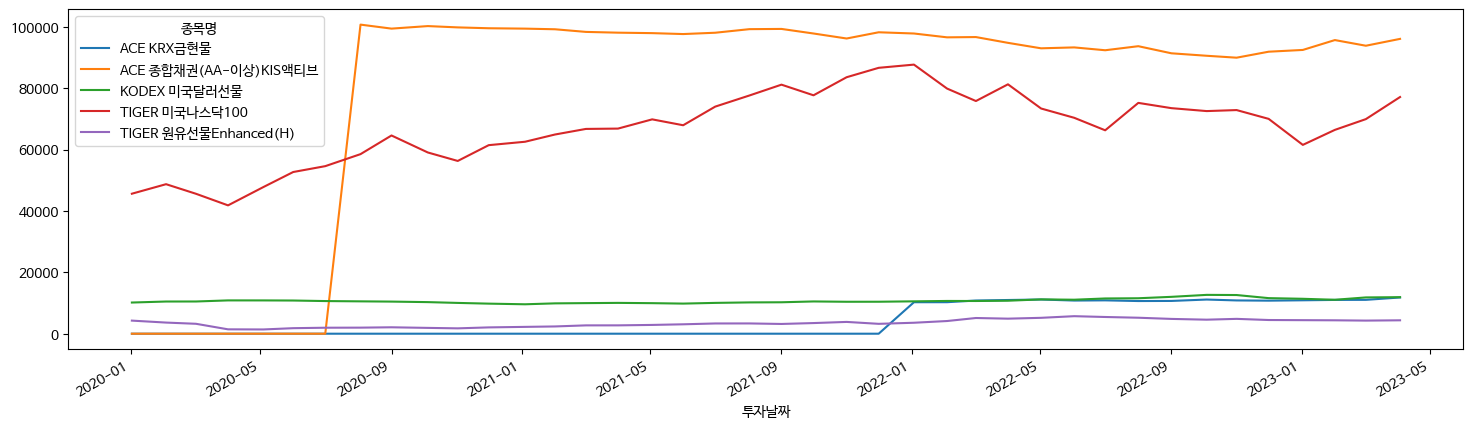

In [54]:
etf_pivot.plot(figsize=(18,5))